# Analyze Nanostring data

In [1]:
%matplotlib inline

In [2]:
!pip install --q squidpy

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.3/148.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.4/124.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.3/159.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43

In [1]:
from pathlib import Path

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq

sc.logging.print_header()

/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:61: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Function "cuInit" not found
  warnings.warn(str(e))


scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.13.1 pandas==2.1.4 scikit-learn==1.3.2 statsmodels==0.14.2 igraph==0.11.6 pynndescent==0.5.13


In [4]:
!mkdir tutorial_data
!mkdir tutorial_data/nanostring_data
!wget -P tutorial_data/nanostring_data https://nanostring-public-share.s3.us-west-2.amazonaws.com/SMI-Compressed/Lung5_Rep2/Lung5_Rep2+SMI+Flat+data.tar.gz
!tar -xzf tutorial_data/nanostring_data/Lung5_Rep2+SMI+Flat+data.tar.gz -C tutorial_data/nanostring_data/

--2024-08-06 13:23:11--  https://nanostring-public-share.s3.us-west-2.amazonaws.com/SMI-Compressed/Lung5_Rep2/Lung5_Rep2+SMI+Flat+data.tar.gz
Resolving nanostring-public-share.s3.us-west-2.amazonaws.com (nanostring-public-share.s3.us-west-2.amazonaws.com)... 52.218.213.41, 3.5.77.171, 52.218.169.177, ...
Connecting to nanostring-public-share.s3.us-west-2.amazonaws.com (nanostring-public-share.s3.us-west-2.amazonaws.com)|52.218.213.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1631848310 (1.5G) [binary/octet-stream]
Saving to: ‘tutorial_data/nanostring_data/Lung5_Rep2+SMI+Flat+data.tar.gz’

Lung5_Rep2+SMI+Flat 100%[===================>]   1.52G  21.6MB/s    in 59s     

2024-08-06 13:24:10 (26.5 MB/s) - ‘tutorial_data/nanostring_data/Lung5_Rep2+SMI+Flat+data.tar.gz’ saved [1631848310/1631848310]



In [3]:
nanostring_dir = Path().resolve() / "tutorial_data" / "nanostring_data"
sample_dir = nanostring_dir / "Lung5_Rep2" / "Lung5_Rep2-Flat_files_and_images"

adata = sq.read.nanostring(
    path=sample_dir,
    counts_file="Lung5_Rep2_exprMat_file.csv",
    meta_file="Lung5_Rep2_metadata_file.csv",
    fov_file="Lung5_Rep2_fov_positions_file.csv",
)

In [5]:
adata

AnnData object with n_obs × n_vars = 106660 × 980
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD45', 'Max.CD45', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID'
    uns: 'spatial'
    obsm: 'spatial', 'spatial_fov'

In [6]:
adata.to_df()

AATK  ABL1  ABL2  ACE  ACE2  ACKR1  ACKR3  ACKR4  ACTA2  ACTG2  ...  \
1_1         0     0     0    0     0      0      0      0      0      0  ...   
2_1         0     0     0    0     0      0      0      0      0      0  ...   
3_1         0     0     0    0     1      0      0      0      0      0  ...   
4_1         0     0     0    0     0      0      0      0      0      0  ...   
5_1         1     0     0    0     0      0      0      0      0      0  ...   
...       ...   ...   ...  ...   ...    ...    ...    ...    ...    ...  ...   
4162_30     0     0     0    0     0      0      0      0      0      0  ...   
4163_30     0     0     0    0     0      0      0      0      0      0  ...   
4164_30     0     0     0    0     1      0      0      0      0      0  ...   
4165_30     0     0     0    0     0      0      0      0      0      0  ...   
4166_30     0     0     0    0     0      0      0      0      0      0  ...   

         NegPrb14  NegPrb15  NegPrb16  NegPrb17  NegPrb18  NegPrb19  NegPrb20  \
1_1             0         0         0         0         0         0         0   
2_1             0         0         0         0         0         0         0   
3_1             0         0         0         0         0         0         0   
4_1             0         0         0         0         0         0         0   
5_1             0         0         0         0         0         0         0   
...           ...       ...       ...       ...       ...       ...       ...   
4162_30         1         0         0         0         0         0         0   
4163_30         0         0         0         0         0         0         0   
4164_30         0         0         0         0         0         0         0   
4165_30         0         0         0         0         0         0         0   
4166_30         0         0         0         0         0         0         0   

         NegPrb21  NegPrb22  NegPrb23  
1_1             0         0         0  
2_1             0         0         0  
3_1             0         2         0  
4_1             0         0         0  
5_1             0         0         0  
...           ...       ...       ...  
4162_30         0         0         0  
4163_30         0         0         0  
4164_30         0         0         0  
4165_30         0         0         0  
4166_30         0         0         1  

[106660 rows x 980 columns]

In [7]:
adata.obs

fov  Area  AspectRatio  CenterX_global_px  CenterY_global_px  Width  \
1_1       1  2142         1.48        8156.000000      162800.222222     59   
2_1       1  2236         2.08        8330.000000      162802.222222     75   
3_1       1  4845         1.15        8987.000000      162779.222222     94   
4_1       1  2915         1.00        9044.000000      162791.222222     59   
5_1       1  8634         1.02        9219.000000      162768.222222    106   
...      ..   ...          ...                ...                ...    ...   
4162_30  30  1538         1.67       30417.888889      177440.222222     55   
4163_30  30  1462         2.07       30561.888889      177438.222222     60   
4164_30  30   747         1.82       32318.888889      177434.222222     40   
4165_30  30  1303         2.58       33351.888889      177436.222222     67   
4166_30  30   763         1.82       31178.888889      177434.222222     40   

         Height  Mean.MembraneStain  Max.MembraneStain  Mean.PanCK  Max.PanCK  \
1_1          40                1075               1842       22954      49711   
2_1          36                1232               4073       23035      65311   
3_1          82                4367              11890        1593      26734   
4_1          59                6017              13814       12387      50409   
5_1         104                3945              13832       10624      47795   
...         ...                 ...                ...         ...        ...   
4162_30      33                 832               2481         178        474   
4163_30      29                 855               2047         152        556   
4164_30      22                1061               1738         139        350   
4165_30      26                2805               6827         148        410   
4166_30      22                 101               3780           1        235   

         Mean.CD45  Max.CD45  Mean.CD3  Max.CD3  Mean.DAPI  Max.DAPI  cell_ID  
1_1             76       385         0       78       1784     11384        1  
2_1             90     10963         0      248       2751     17658        2  
3_1            225      1329         5      283       8988     35448        3  
4_1             54       623         0       96         69      3837        4  
5_1             42     10543         0       85        227      6058        5  
...            ...       ...       ...      ...        ...       ...      ...  
4162_30         50       385         0       60       3186     12719     4162  
4163_30        552      2932         0        0       9886     34212     4163  
4164_30        108       392         0        3       5855     12940     4164  
4165_30        296      1054         0       29       6283     19087     4165  
4166_30          0         0         0        0       5384     15602     4166  

[106660 rows x 18 columns]

In [4]:
adata.var["NegPrb"] = adata.var_names.str.startswith("NegPrb")
sc.pp.calculate_qc_metrics(adata, qc_vars=["NegPrb"], inplace=True)

In [5]:
import pandas as pd

pd.set_option("display.max_columns", None)

In [13]:
adata

AnnData object with n_obs × n_vars = 106660 × 980
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD45', 'Max.CD45', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb'
    var: 'NegPrb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial', 'spatial_fov'

In [14]:
adata.obs["total_counts_NegPrb"].sum() / adata.obs["total_counts"].sum() * 100

0.3722155201830987

<ipython-input-15-4ba17e5dd9b2>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby("fov").sum()["total_counts"],


<Axes: title={'center': 'Transcripts per FOV'}, xlabel='total_counts', ylabel='Count'>

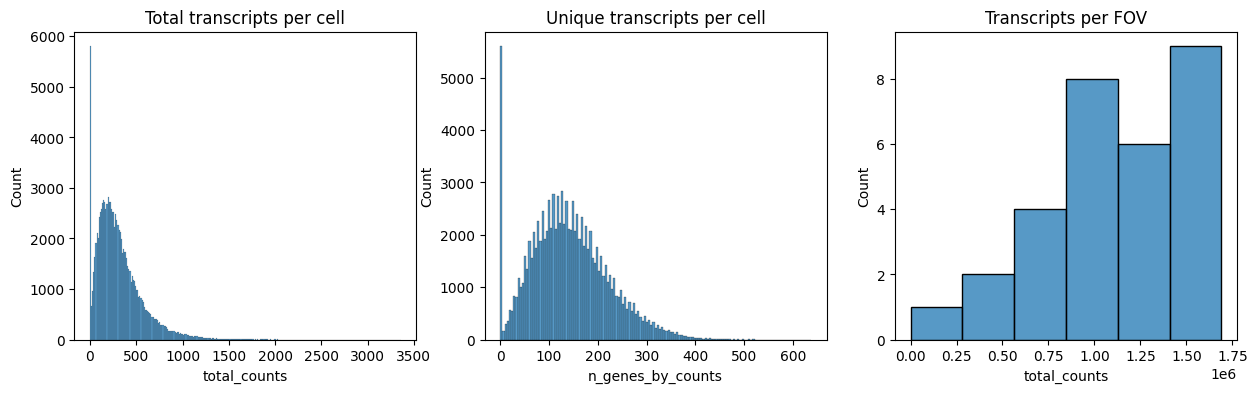

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].set_title("Total transcripts per cell")
sns.histplot(
    adata.obs["total_counts"],
    kde=False,
    ax=axs[0],
)

axs[1].set_title("Unique transcripts per cell")
sns.histplot(
    adata.obs["n_genes_by_counts"],
    kde=False,
    ax=axs[1],
)

axs[2].set_title("Transcripts per FOV")
sns.histplot(
    adata.obs.groupby("fov").sum()["total_counts"],
    kde=False,
    ax=axs[2],
)

<Axes: title={'center': 'CD3'}, xlabel='Mean.CD3', ylabel='Count'>

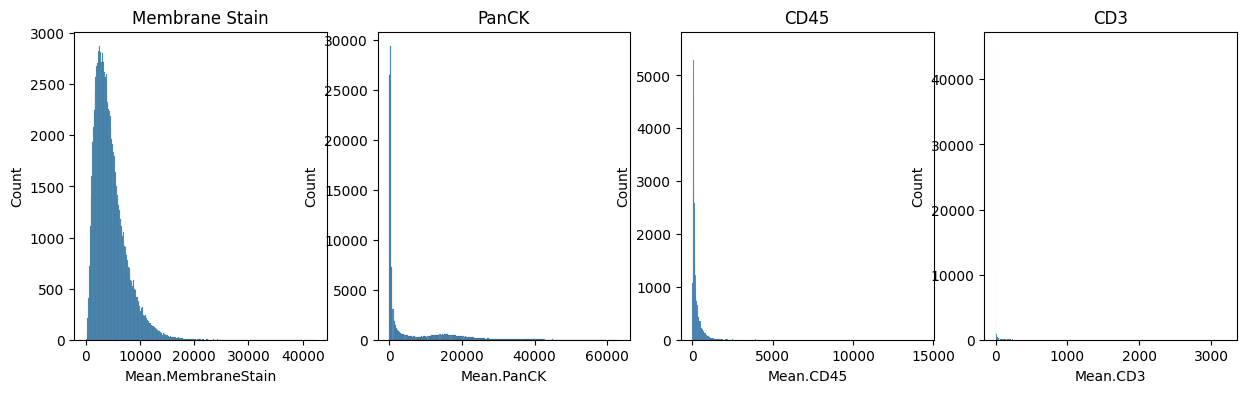

In [16]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))

axs[0].set_title("Membrane Stain")
sns.histplot(
    adata.obs["Mean.MembraneStain"],
    kde=False,
    ax=axs[0],
)

axs[1].set_title("PanCK")
sns.histplot(
    adata.obs["Mean.PanCK"],
    kde=False,
    ax=axs[1],
)

axs[2].set_title("CD45")
sns.histplot(
    adata.obs["Mean.CD45"],
    kde=False,
    ax=axs[2],
)

axs[3].set_title("CD3")
sns.histplot(
    adata.obs["Mean.CD3"],
    kde=False,
    ax=axs[3],
)

In [6]:
sc.pp.filter_cells(adata, min_counts=100)
sc.pp.filter_genes(adata, min_cells=400)

In [18]:
!pip install scikit-misc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.8/188.8 kB 2.9 MB/s eta 0:00:00


In [7]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

<ipython-input-7-1ab1e7923654>:7: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


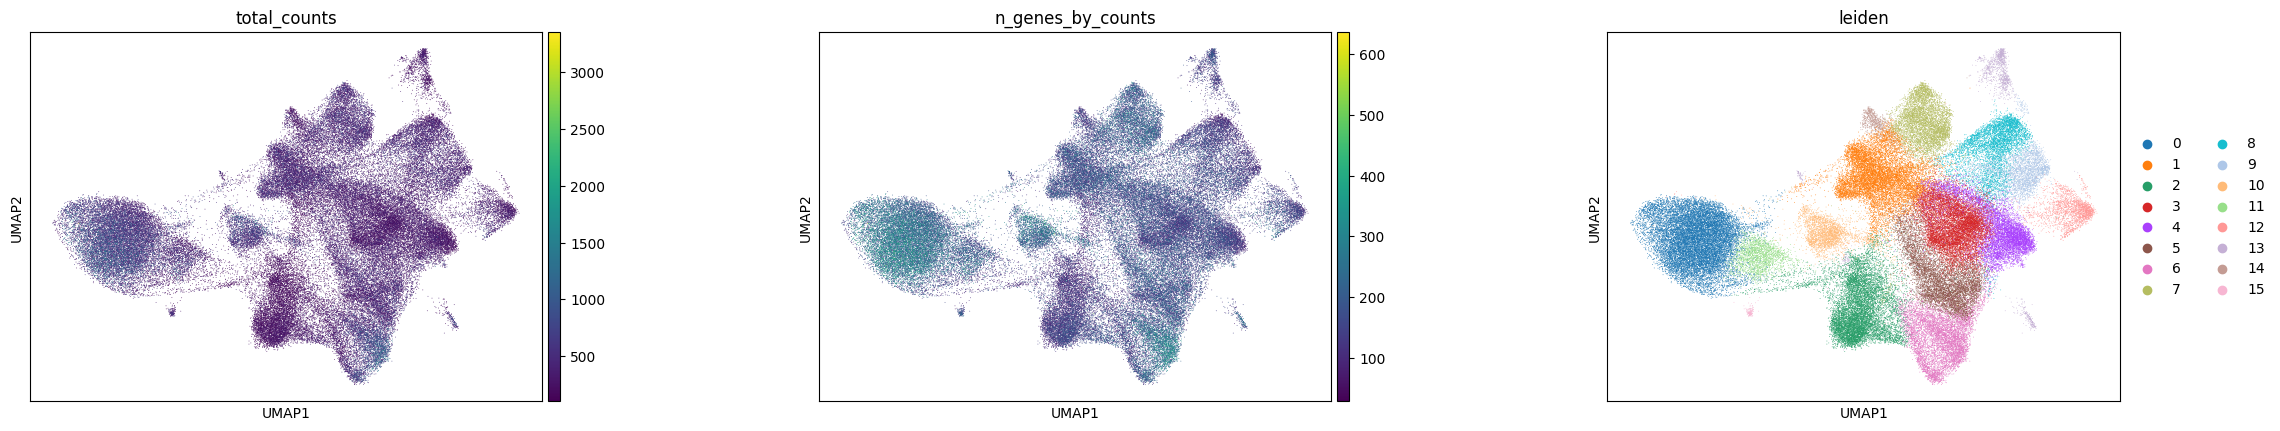

In [12]:
sc.pl.umap(
    adata,
    color=[
        "total_counts",
        "n_genes_by_counts",
        "leiden",
    ],
    wspace=0.4,
)

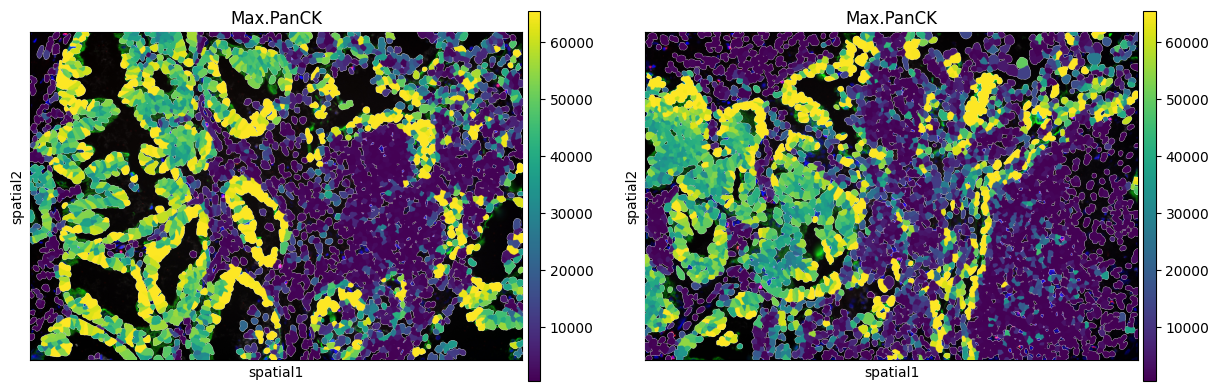

In [13]:
sq.pl.spatial_segment(
    adata,
    color="Max.PanCK",
    library_key="fov",
    library_id=["12", "16"],
    seg_cell_id="cell_ID",
)

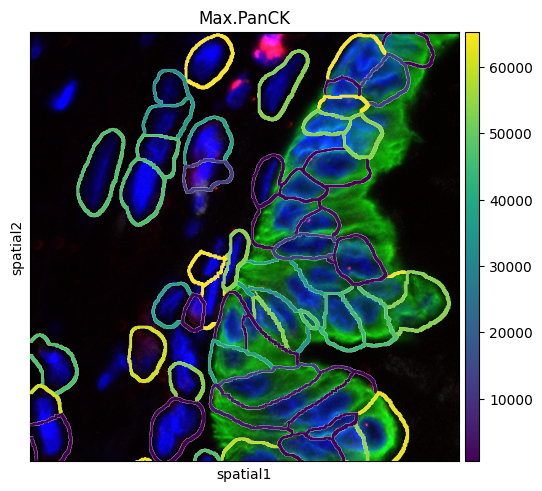

In [14]:
sq.pl.spatial_segment(
    adata,
    color="Max.PanCK",
    library_key="fov",
    library_id="12",
    seg_cell_id="cell_ID",
    seg_contourpx=10,
    crop_coord=[(0, 0, 700, 700)],
)

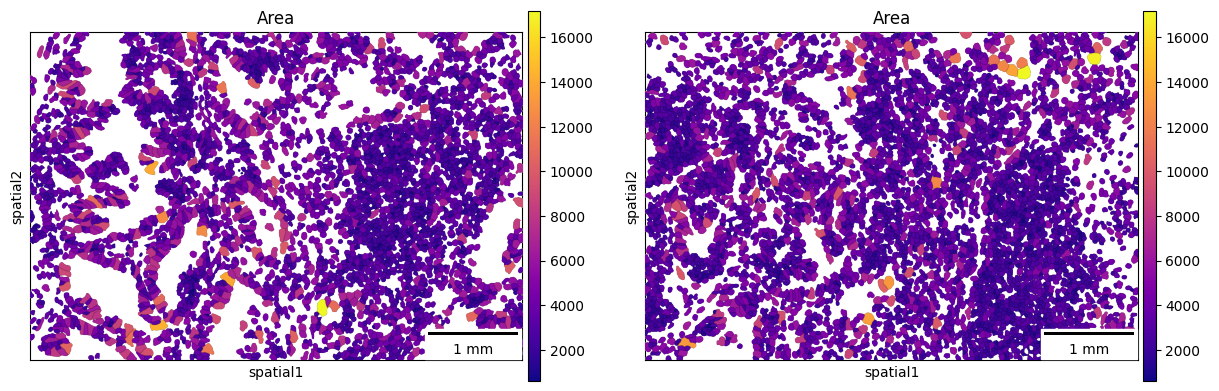

In [15]:
sq.pl.spatial_segment(
    adata,
    color="Area",
    library_key="fov",
    library_id=["12", "16"],
    seg_cell_id="cell_ID",
    seg_outline=True,
    cmap="plasma",
    img=False,
    scalebar_dx=1.0,
    scalebar_kwargs={"scale_loc": "bottom", "location": "lower right"},
)

In [16]:
import gc
gc.collect()

140535

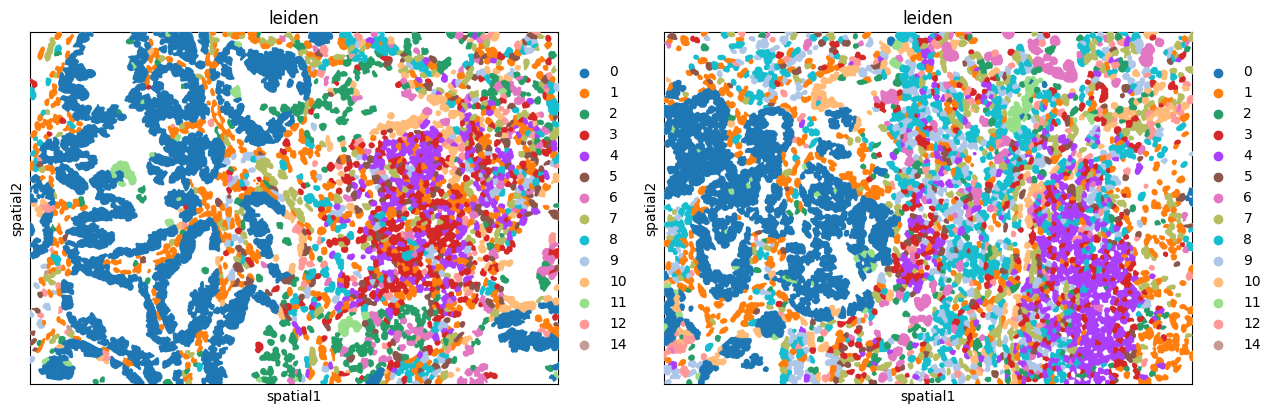

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
sq.pl.spatial_segment(
    adata,
    shape="hex",
    color="leiden",
    library_key="fov",
    library_id="12",
    seg_cell_id="cell_ID",
    img=False,
    size=60,
    ax=ax[0],
)

sq.pl.spatial_segment(
    adata,
    color="leiden",
    seg_cell_id="cell_ID",
    library_key="fov",
    library_id="16",
    img=False,
    size=60,
    ax=ax[1],
)

In [19]:
import gc
gc.collect()

6624

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


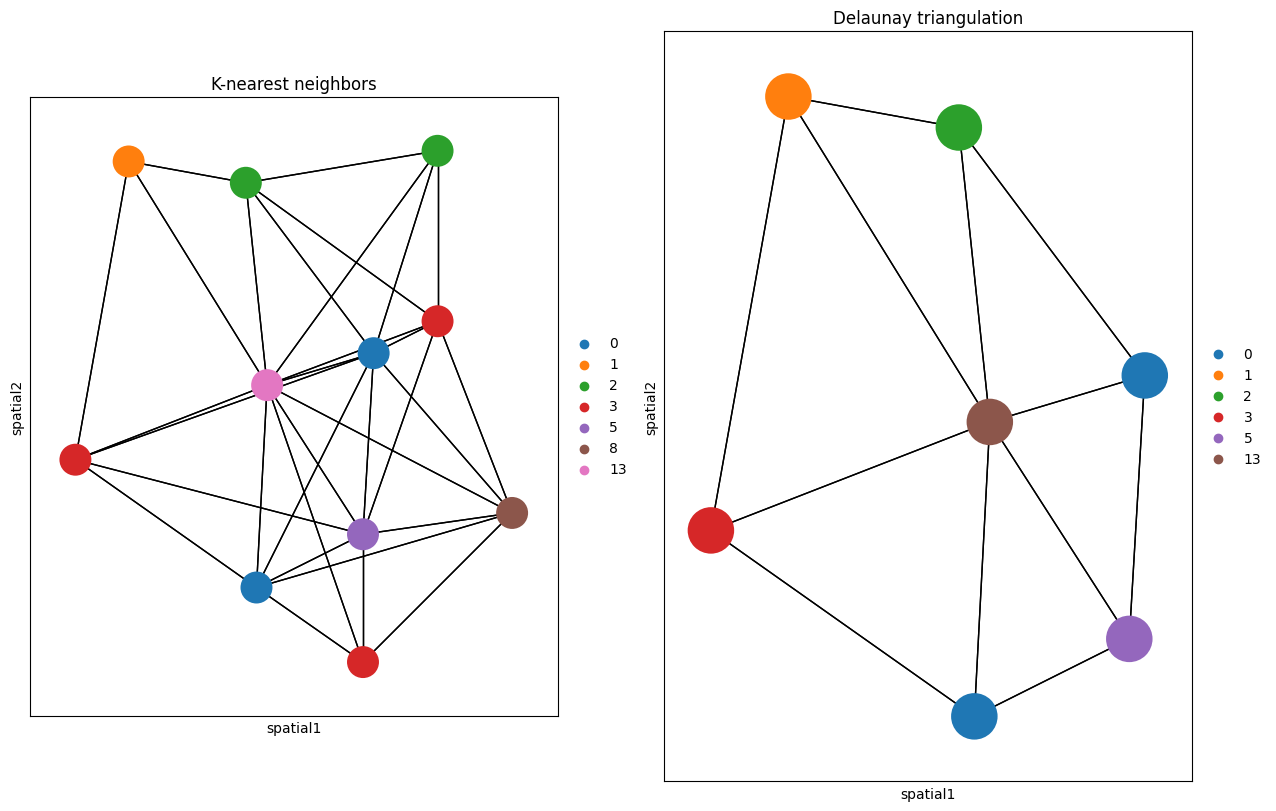

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15, 15))
sq.gr.spatial_neighbors(
    adata,
    n_neighs=10,
    coord_type="generic",
)
_, idx = adata.obsp["spatial_connectivities"][420, :].nonzero()
idx = np.append(idx, 420)
sq.pl.spatial_scatter(
    adata[idx, :],
    library_id="16",
    color="leiden",
    connectivity_key="spatial_connectivities",
    size=3,
    edges_width=1,
    edges_color="black",
    img=False,
    title="K-nearest neighbors",
    ax=ax[0],
)

sq.gr.spatial_neighbors(
    adata,
    n_neighs=10,
    coord_type="generic",
    delaunay=True,
)
_, idx = adata.obsp["spatial_connectivities"][420, :].nonzero()
idx = np.append(idx, 420)
sq.pl.spatial_scatter(
    adata[idx, :],
    library_id="16",
    color="leiden",
    connectivity_key="spatial_connectivities",
    size=3,
    edges_width=1,
    edges_color="black",
    img=False,
    title="Delaunay triangulation",
    ax=ax[1],
)

In [12]:
adata_subset = adata[adata.obs.fov == "16"].copy()

ERROR: Unable to fetch palette, reason: 'leiden_colors'. Using `None`.


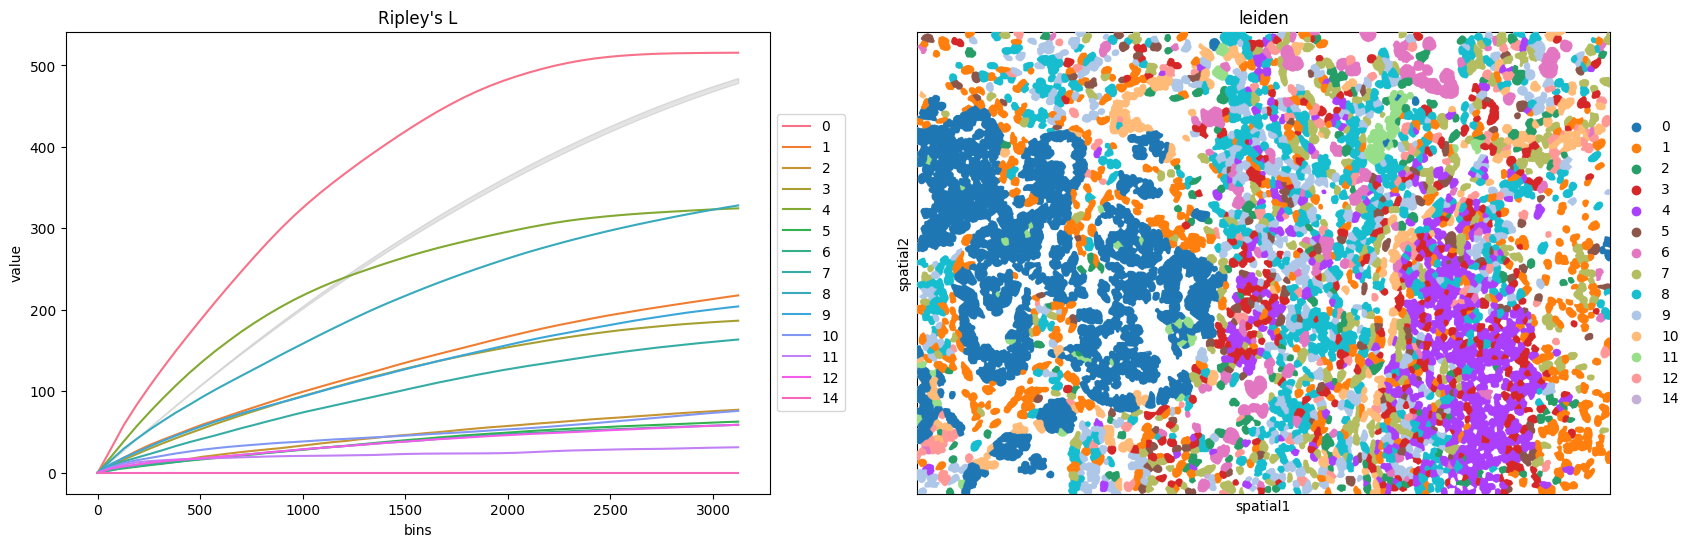

In [13]:
mode = "L"
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

sq.gr.ripley(adata_subset, cluster_key="leiden", mode=mode)
sq.pl.ripley(
    adata_subset,
    cluster_key="leiden",
    mode=mode,
    ax=ax[0],
)

sq.pl.spatial_segment(
    adata_subset,
    shape="hex",
    color="leiden",
    library_id="16",
    library_key="fov",
    seg_cell_id="cell_ID",
    img=False,
    size=60,
    ax=ax[1],
)

In [15]:
sq.gr.spatial_neighbors(adata_subset, coord_type="generic", delaunay=True)
sq.gr.spatial_autocorr(
    adata_subset,
    mode="moran",
    n_perms=100,
    n_jobs=1,
)
adata_subset.uns["moranI"].head(10)

  0%|          | 0/100 [00:00<?, ?/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


I  pval_norm  var_norm  pval_z_sim  pval_sim   var_sim  \
KRT19    0.774879        0.0  0.000076         0.0  0.009901  0.000171   
OLFM4    0.752305        0.0  0.000076         0.0  0.009901  0.000206   
CEACAM6  0.749981        0.0  0.000076         0.0  0.009901  0.000156   
KRT17    0.665890        0.0  0.000076         0.0  0.009901  0.000129   
S100A6   0.624956        0.0  0.000076         0.0  0.009901  0.000166   
TM4SF1   0.586031        0.0  0.000076         0.0  0.009901  0.000150   
EPCAM    0.556131        0.0  0.000076         0.0  0.009901  0.000168   
KRT8     0.528026        0.0  0.000076         0.0  0.009901  0.000146   
ANXA2    0.511835        0.0  0.000076         0.0  0.009901  0.000134   
PIGR     0.498941        0.0  0.000076         0.0  0.009901  0.000151   

         pval_norm_fdr_bh  pval_z_sim_fdr_bh  pval_sim_fdr_bh  
KRT19                 0.0                0.0         0.019252  
OLFM4                 0.0                0.0         0.019252  
CEACAM6               0.0                0.0         0.019252  
KRT17                 0.0                0.0         0.019252  
S100A6                0.0                0.0         0.019252  
TM4SF1                0.0                0.0         0.019252  
EPCAM                 0.0                0.0         0.019252  
KRT8                  0.0                0.0         0.019252  
ANXA2                 0.0                0.0         0.019252  
PIGR                  0.0                0.0         0.019252

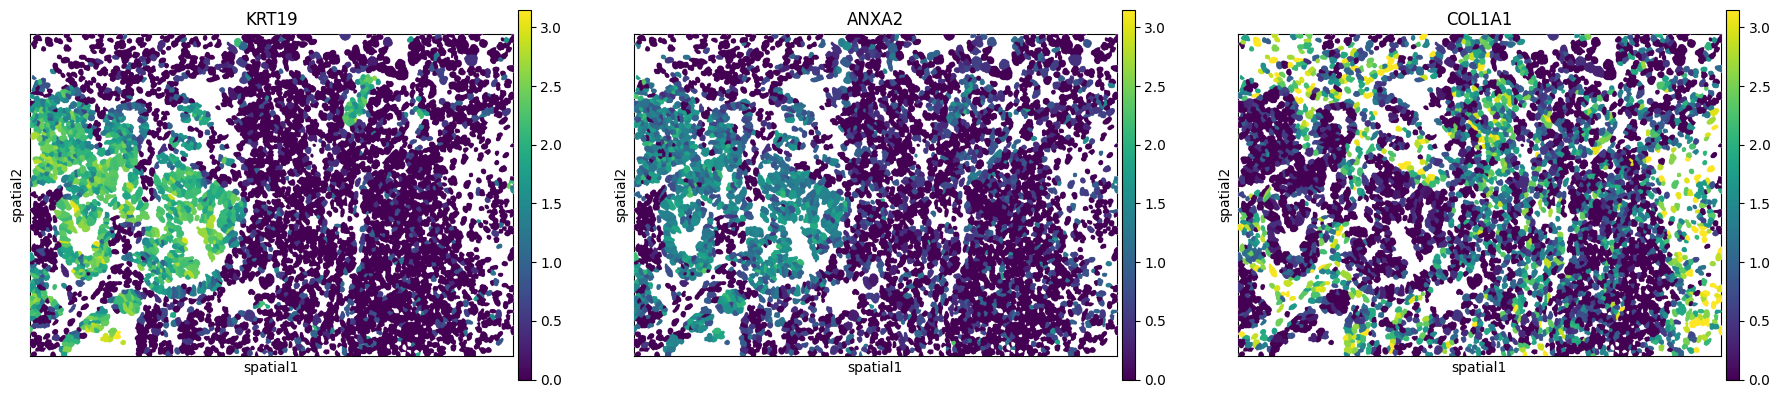

In [16]:
sq.pl.spatial_segment(
    adata_subset,
    library_id="16",
    seg_cell_id="cell_ID",
    library_key="fov",
    color=["KRT19", "ANXA2", "COL1A1"],
    size=60,
    img=False,
)

  0%|          | 0/1 [00:00<?, ?/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


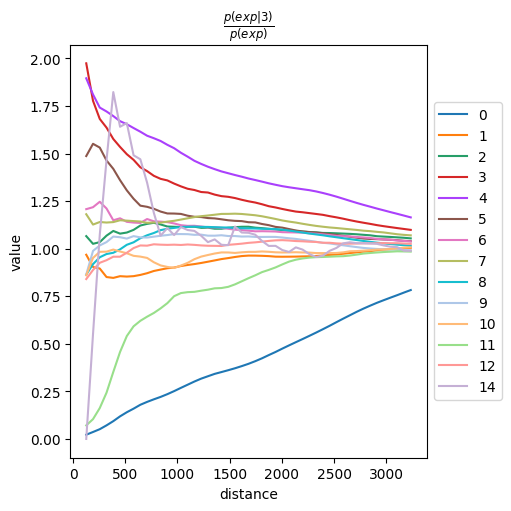

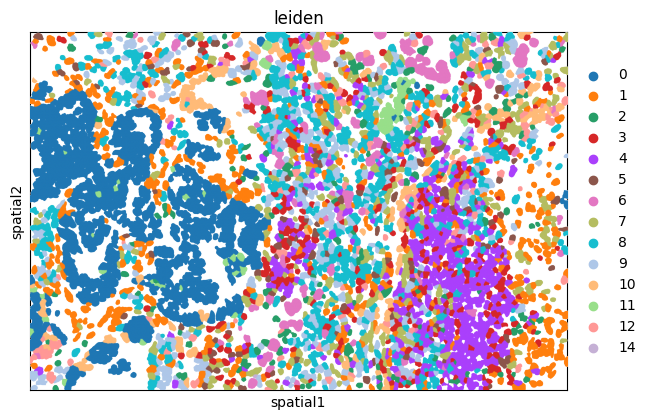

In [18]:
sq.gr.co_occurrence(
    adata_subset,
    cluster_key="leiden",
)
sq.pl.co_occurrence(
    adata_subset,
    cluster_key="leiden",
    clusters="3",
)


sq.pl.spatial_segment(
    adata_subset,
    shape="hex",
    color="leiden",
    library_id="16",
    library_key="fov",
    seg_cell_id="cell_ID",
    img=False,
    size=60,
)

In [20]:
adata_spatial_neighbor = sq.gr.spatial_neighbors(
    adata, coord_type="generic", delaunay=True
)

In [21]:
sq.gr.centrality_scores(adata, cluster_key="leiden")

ERROR: Unable to fetch palette, reason: 'leiden_colors'. Using `None`.


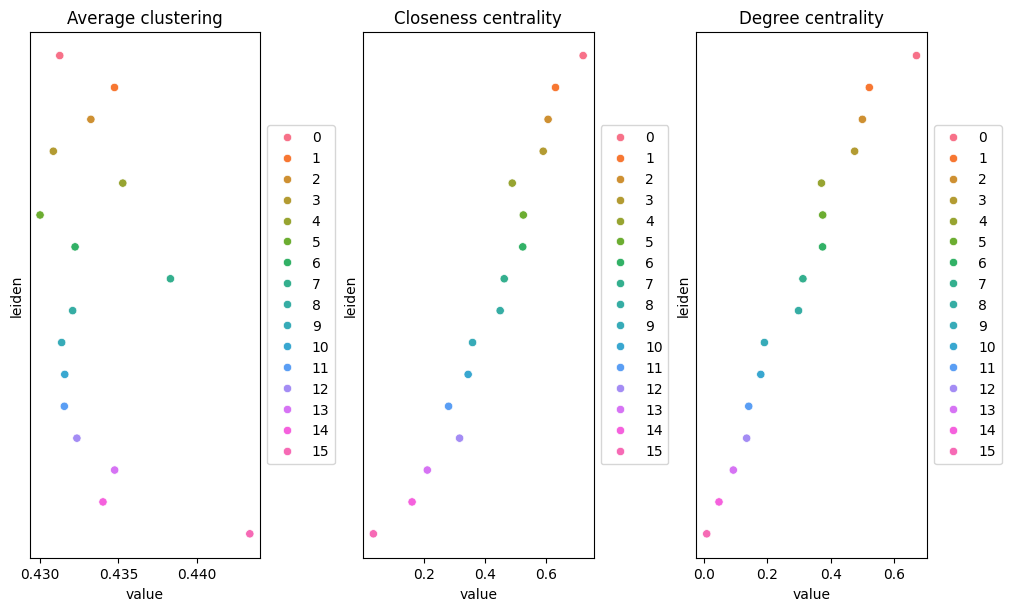

In [22]:
sq.pl.centrality_scores(adata, cluster_key="leiden", figsize=(10, 6))

In [23]:
sq.gr.nhood_enrichment(adata, cluster_key="leiden")

  0%|          | 0/1000 [00:00<?, ?/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [24]:
sq.gr.nhood_enrichment(adata_subset, cluster_key="leiden")

  0%|          | 0/1000 [00:00<?, ?/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/squidpy/gr/_nhood.py:194: RuntimeWarning: invalid value encountered in divide
  zscore = (count - perms.mean(axis=0)) / perms.std(axis=0)


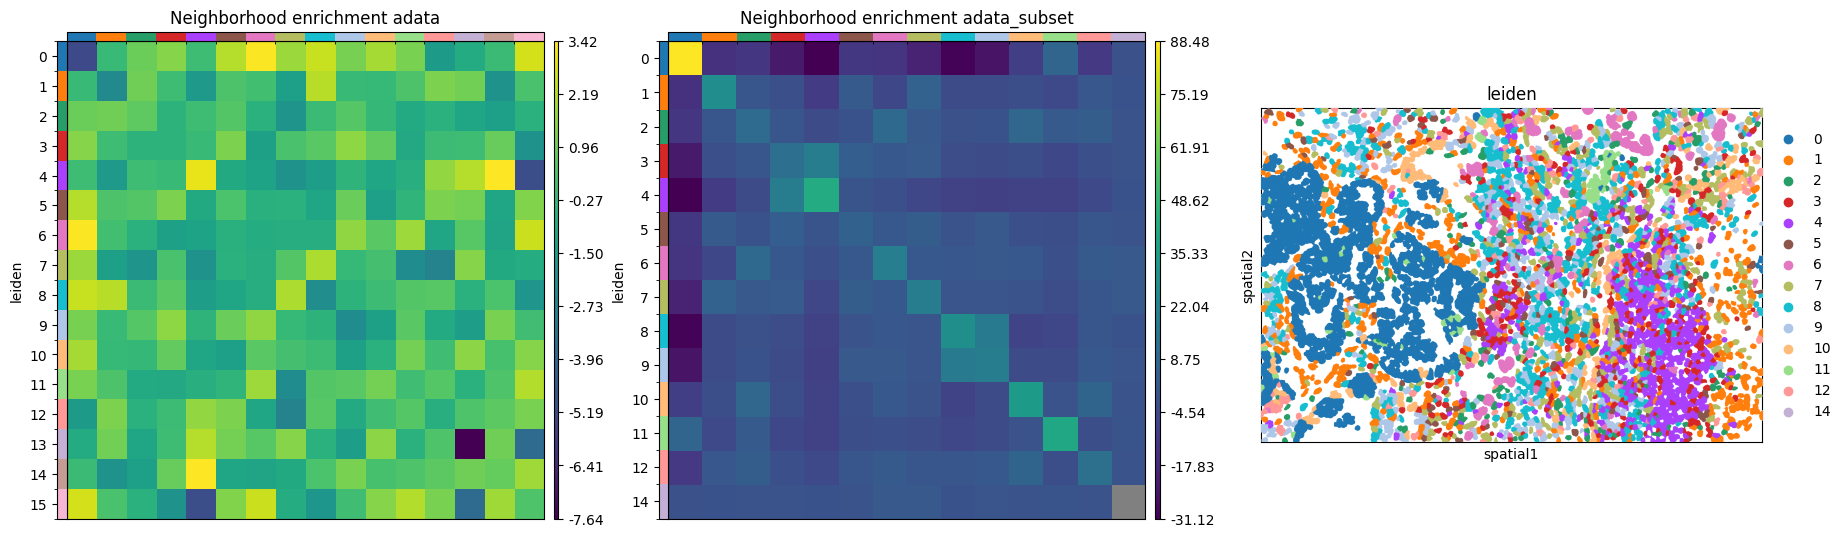

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(22, 22))
sq.pl.nhood_enrichment(
    adata,
    cluster_key="leiden",
    figsize=(3, 3),
    ax=ax[0],
    title="Neighborhood enrichment adata",
)
sq.pl.nhood_enrichment(
    adata_subset,
    cluster_key="leiden",
    figsize=(3, 3),
    ax=ax[1],
    title="Neighborhood enrichment adata_subset",
)
sq.pl.spatial_segment(
    adata_subset,
    shape="hex",
    color="leiden",
    library_id="16",
    library_key="fov",
    seg_cell_id="cell_ID",
    img=False,
    size=60,
    ax=ax[2],
)